# My first script with TensorFlow

We will demonstrate fitting a neural network to a sine function.

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(100, 1) (100, 1)


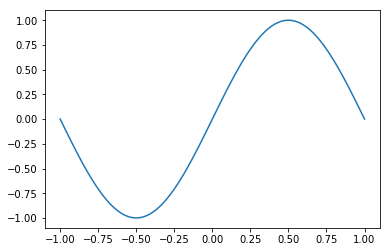

In [2]:
trainx = np.linspace(-1,1,100, dtype=np.float32).reshape((-1,1))
trainy = np.array(np.sin(np.pi*trainx), dtype=np.float32)
plt.plot(trainx, trainy)
print(trainx.shape, trainy.shape)

In [3]:
x = tf.placeholder(tf.float32, (None,1), name='x')
y = tf.placeholder(tf.float32, (None,1), name='y')
n_units = 128

with tf.variable_scope('lreg'):
    w = tf.Variable(tf.random_normal((1,n_units)), name='W')
    tf.summary.histogram('W', w)
    b = tf.Variable(tf.random_normal((1,n_units)), name='b')
    tf.summary.histogram('b', b)
    prod = tf.matmul(x, w, name='prod') + b
    mid = tf.nn.relu(prod, name='mid')
    tf.summary.histogram('mid', mid)
    w2 = tf.Variable(tf.random_normal((n_units,1)), name='W2')
    tf.summary.histogram('W2', w2)
    b2 = tf.Variable(tf.zeros((1,1)), name='b2')
    tf.summary.histogram('b2', b2)
    y_pred = tf.matmul(mid, w2, name='y_pred') + b2
    loss = tf.reduce_mean(tf.square(y_pred - y))
    tf.summary.scalar('loss', loss)

In [4]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(0.02).minimize(loss)

In [5]:
merged_summary = tf.summary.merge_all()

In [6]:
sess = tf.Session()

In [7]:
writer = tf.summary.FileWriter('TensorFlowTest/1')
writer.add_graph(sess.graph)

In [8]:
init = tf.global_variables_initializer()
use_batch = True
loss_hist = []
sess.run(init)

feed_dict = {x: trainx.reshape((-1,1)), y: trainy.reshape((-1,1))}
for n in range(5000):
    if use_batch:
        loss_val, _ = sess.run([loss, optimizer], feed_dict)
    else:
        for i in range(len(trainx)):
            feed_dict = {x: trainx[i].reshape((1,1)), y: trainy[i].reshape((1,1))}
            loss_val, _ = sess.run([loss, optimizer], feed_dict)
    loss_hist.append(loss_val)
    if n % 10 == 0:
        s = sess.run(merged_summary, feed_dict=feed_dict)
        writer.add_summary(s, n)
    if n % 1000 == 0:
        print('loss[{}]: '.format(n), loss_val.mean())

y_pred_batch = [sess.run(y_pred, {x: xi.reshape((1,1))})[0][0] for xi in trainx]

loss[0]:  5.0633
loss[1000]:  0.000195075
loss[2000]:  0.000162364
loss[3000]:  9.4391e-05
loss[4000]:  6.9912e-05


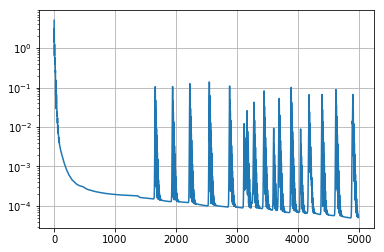

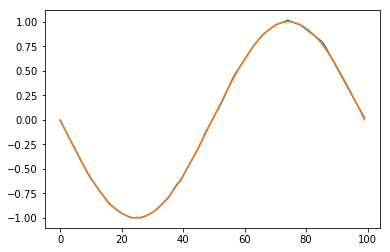

In [9]:
plt.semilogy(loss_hist)
plt.grid()
plt.figure()
plt.plot(np.transpose([y_pred_batch, trainy.reshape((-1))]), '-')